### 7월 18일 수업(pdf 파일 122페이지 시작)
2x3x2 신경망의 가중치를 살펴보면 표기법이 이전과는 약간 다른 것을 확인할 수 있다.

w<sub>11</sub><sup>(1)</sup>
- 위첨자 (1) : 1층(입력층)을 의미한다. 
- 아래첨자 11 : 1번째 뉴런(노드)에서 2층(은닉층)의 1번째로 간다는 의미로 사용

### 124페이지
122페이지에서 살펴본 신경망의 구조를 살펴보면, 이후에 나올 방대한 양의 미분식 생각에 정신이 아득해진다. 수학 없이 간단하게 계산식을 세울 수 있는 **오미입, 오메가미입** 공식을 사용하면 편리하게 식을 세울 수 있다.(보내드린 캡쳐본 참고하시면서 125페이지 사진도 같이 보시면 좋을 것 같습니다 !)

### 126페이지
직접 공식을 오미입, 오메가미입으로 계산해보고 정답을 코드에 있는 수식과 비교해보시면서 연습하시면 좋을 것 같습니다.

### 128페이지
델타 규칙의 경우 읽어보시고 이해가 가능하다면 좋지만 이해가 되지 않는 경우도 상관없습니다. 오미입 오메가미입을 알기때문에..

### 131페이지
코로나 감염 예측 실습 예제 코드는 아래에 첨부하였습니다.

7
0 EPOCH-ERROR: 0.3250932484748764
1 EPOCH-ERROR: 0.3095877139892581
2 EPOCH-ERROR: 0.2933015981551835
3 EPOCH-ERROR: 0.2765657452454484
4 EPOCH-ERROR: 0.25978205255026376
5 EPOCH-ERROR: 0.24337860299986686
6 EPOCH-ERROR: 0.22775589615115494
7 EPOCH-ERROR: 0.21324016613852853
8 EPOCH-ERROR: 0.20005677499181462
9 EPOCH-ERROR: 0.18832764063581836
10 EPOCH-ERROR: 0.1780877047999247
11 EPOCH-ERROR: 0.16931125075596476
12 EPOCH-ERROR: 0.1619397355378167
13 EPOCH-ERROR: 0.1559061331477887
14 EPOCH-ERROR: 0.15115401887318858
15 EPOCH-ERROR: 0.1476515284212371
16 EPOCH-ERROR: 0.145400771768778
17 EPOCH-ERROR: 0.14444257092904317
18 EPOCH-ERROR: 0.14485489483338085
19 EPOCH-ERROR: 0.14674165822358468
20 EPOCH-ERROR: 0.15020788575739488
21 EPOCH-ERROR: 0.15531978872644184
22 EPOCH-ERROR: 0.1620559226500064
23 EPOCH-ERROR: 0.17026632584193624
24 EPOCH-ERROR: 0.17966189468989757
25 EPOCH-ERROR: 0.18984664377080215
26 EPOCH-ERROR: 0.20038323710759176
27 EPOCH-ERROR: 0.21086438111662884
28 EPOCH-ER

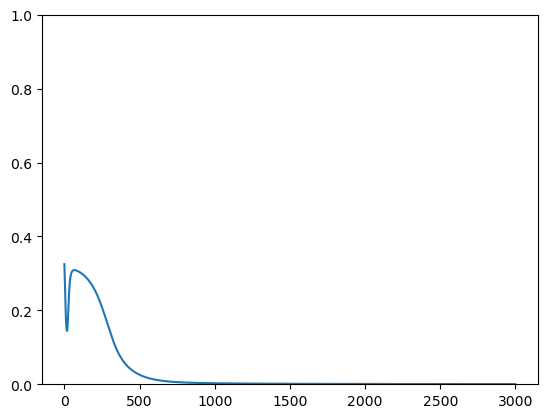


Cold or Covid 19?
Fever, Cough -> Cold? : 93.90 %, Covid19 ? : 2.89 % 



In [1]:
import matplotlib.pyplot as plt # 그래프 시각화를 위한 라이브러리를 임포트
import numpy as np

alpha = 0.1 # 학습률
epochs = 3000 # 학습 횟수
n_hidden = 4 # 히든 레이어의 수

wt = [] # 가중치를 저장할 빈 배열
bs = [] # 편향값을 저장할 빈 배열
def init_weight(n_input, n_output):
    global wt, bs # wt, bs를 전역변수화 시킴으로서 함수 안에서 발생하는 가중치 배열, 편향값 배열의 변동사항을 외부에도 적용시킴.
    for _ in range(n_input * n_hidden + n_hidden * n_output): # input값의 개수*은닉층의 개수 + 은닉층의 개수*출력층의 개수 = 필요한 가중치의 개수
        wt.append(np.random.rand()) # 랜덤한 값을 가중치 배열에 추가한다.
    for _ in range(n_hidden + n_output): # 은닉층의 개수 + 출력층의 개수 = 필요한 편향값의 개수
        bs.append(np.random.rand()) # 랜덤한 값을 편향값 배열에 추가한다.
    
def sigmoid(x): # 활성화 함수 정의
    return 1/(1+np.exp(-x))

def forward(x, n_output):
    u = []; y = [] # 컴퓨터 언어에서 문장의 끝에 ; 을 붙이는 것은 해당 줄의 코드가 끝났음을 의미합니다. 
                   # 다행히도 파이썬의 경우 해당 줄의 코드가 끝나면 줄바꿈(엔터)하는 행위로 줄의 코드가 끝났음을 알릴 수 있지만,
                   # 한 줄에 여러개의 변수를 정의하고 싶다면 u = 12; y = 12식으로 변수를 선언할 수 있습니다.
                   # u : 입력층 -> 은닉층 값들을 저장할 빈 배열
                   # y : 은닉층 -> 출력층 값들을 저장할 빈 배열
                   
    n_input = len(x) # 입력층 개수
                         
    # 입력층 -> 은닉층 계산
    for j in range(n_hidden):
        sum = 0 
        for n in range(n_input): # 각 훈련 데이터에 대해서, 
            tmp = wt[n*n_input + j] * x[n] # 가중합 공식 중, w*x 부분에 해당
            sum += tmp # w*x 부분을 모두 더하고
        u.append(sigmoid(sum + bs[j])) # n개의 입력으로부터 받은 가중치*입력값 + 편향값을 활성화해서 저장
    
    # 은닉층 -> 출력층 계산(출력 -> 은닉 과정과 동일)
    for k in range(n_output):
        sum = 0 
        for n in range(n_hidden):
            tmp = wt[n_input*n_hidden + n*n_output + k] * u[n]
            sum += tmp
        y.append(sigmoid(sum+bs[n_hidden+k]))
    return u, y

# 역전파 계산(계산 그래프를 이용하면 이해하기 더 쉬움)
def backpropagate(x, u, y, t):
    dE_dw = [] # 가중치 기울기 값의 빈 리스트
    dE_db = [] # 편향값 기울기 값의 빈 리스트
    n_input = len(x); n_output = len(t) # 입력값의 개수, 출력값의 개수 정의
    
    # 출력층 -> 입력층 역전파 계산
    for i in range(n_input):
        for j in range(n_hidden):  
            sum = 0
            for n in range(n_output):
                tmp = (y[n]-t[n])*(1-y[n])*y[n]*wt[n_input*n_hidden + j + n_hidden*n] # 오 메 가 부분을 계산해서
                sum += tmp # 모두 더하고, 
            dE_dw.append(sum*(1-u[j])*u[j]*x[i]) # 더한 결과에 공통되는 부분인 미*입을 한꺼번에 곱해서 계산
    
    # 출력 -> 은닉층 역전파 계산
    for j in range(n_hidden):
        sum = 0
        for k in range(n_output):
            dE_dw.append((y[k]-t[k])*(1-y[k])*y[k]*u[j]) # 출력 -> 은닉층의 공식은 오미입. 계산해서 가중치 기울기 리스트에 저장
            tmp = (y[k]-t[k])*(1-y[k])*y[k]*wt[n_input*n_hidden+j+n_hidden*k] # 출력 -> 은닉층 편향값에 대한 오 메 가 부분을 계산해서
            sum += tmp # 모두 더하고
        dE_db.append(sum*(1-u[j])*u[j]) # 모두 더한 결과에 미*입(입력값의 경우, 1이기에 식 상에는 반영하지 않음)을 한꺼번에 곱해서 편향값 기울기 리스트에 저장
        
    # 출력층 편향값에 대한 역전파 계산
    for i in range(n_output):
        tmp = (y[i]-t[i])*(1-y[i])*y[i]
        dE_db.append(tmp)

    return dE_dw, dE_db

# 가중치 업데이트
def update_weight(dE_dw, dE_db):
    global wt, bs
    for i in range(len(wt)):
        wt[i] = wt[i] - alpha * dE_dw[i]
    for i in range(len(bs)):
        bs[i] = bs[i] - alpha * dE_db[i]

# 손실함수(MSE)로 손실값 계산
def calc_error(y, t):
    err = 0
    for i in range(len(t)):
        tmp = 0.5*(y[i]-t[i])**2 # loss function
        err = err + tmp
    return err

def error_graph(error): # 학습이 진행됨(epoch)에 따른 Error값 변화를 가시화
    plt.ylim(0.0, 1.0) # 오차 그래프의 y축(오차값)의 표시 범위 설정
    plt.plot(np.arange(0, error.shape[0]), error)
    plt.show()

def train(X, T):
    error = np.zeros(epochs) # 손실함수값(오차) 초기화
    n_input = X.shape[1] # 입력 노드 수
    n_output = T.shape[1] # 출력 노드 수
    # 가중치 초기화
    init_weight(n_input, n_output)
    ###### 입력과 정답으로 학습(train with input and teaching datum) ######
    for n in range(epochs): # epoch수 만큼 반복
        for i in range(X.shape[0]): # 입력 데이터 개수
            x = X[i, :] # x: 입력값 처음부터 끝까지
            t = T[i, :] # t: 출력값 처음부터 끝까지
            ### 신경망 순방향 계산(forward) ##########
            u, y = forward(x, n_output)
            ### 오차역전파 역방향 계산(backpropagation) ##########
            dE_dw, dE_db = backpropagate(x, u, y, t)
            ### 경사하강법, 가중치 업데이트(weight update) #####
            update_weight(dE_dw, dE_db)
            ### 에러 계산(calculate error) #####
            error[n] = calc_error(y, t)
        print("{} EPOCH-ERROR: {}".format(n, error[n]))
    error_graph(error)
    
def predict(x, n_output):
    u, y = forward(x, n_output)
    return u, y # 예측 = 신경망의 가중치가 업데이트된 후의 순방향 계산

if __name__ == '__main__':
    X = np.array([[1,0,0,1], [1,0,0,0], [0,0,1,1], [0,1,0,0], [1,1,0,0], [0,1,0,1], [0,0,1,0]]) # 학습용 입력 데이터
    T = np.array([[0, 1], [0.5, 0.5], [1, 0], [0, 0], [0, 1], [0, 0.5], [1, 0]]) # 정답 데이터
    train(X, T)

    x = np.array([1, 0, 1, 0]) # 테스트용 입력 데이터(발열과 기침)
    u, y = predict(x, T.shape[1]) # 테스트용 입력 데이터에 의한 예측
    print("")
    print("Cold or Covid 19?")
    print("Fever, Cough -> Cold? : {:.2f} %, Covid19 ? : {:.2f} % ".format(y[0]*100, y[1]*100))
    print("")